In [90]:
# loaded needed packages and the data.
import sys
import numpy as np
import thinkstats2
import thinkplot
%matplotlib inline

from collections import defaultdict

dct_file='D:/data science/classes/DSC530 Exploratory_Data_Analysis/thinkstats/ThinkStats2-master/code/2002FemPreg.dct'
dat_file='D:/data science/classes/DSC530 Exploratory_Data_Analysis/thinkstats/ThinkStats2-master/code/2002FemPreg.dat.gz'

nrows=None


df: pregnancy DataFrame

dct = thinkstats2.ReadStataDct(dct_file)
df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)


In [18]:
#added the column that we are going to study 
df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16.0
df.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231,6.1875


In [23]:
#created data frame with outcome equal 1 which is the pregnancy had a live a baby.
live = df[df.outcome == 1]

#created data frame for first babies
first_baby = live[live.birthord ==1]

#created data frame for other babies
others = live[live.birthord !=1]


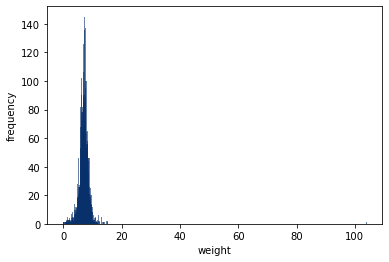

<Figure size 576x432 with 0 Axes>

In [37]:
# computing the frenquency of first babies

first_hist = thinkstats2.Hist(first_baby.totalwgt_lb)

# plotting the hist

thinkplot.Hist(first_hist)

thinkplot.show(xlabel='weight', ylabel='frequency')



from the result above it looks like there is outliers.

In [40]:
# checking if there is any outliers.

for weight, freq in first_hist.Largest(10):
    print(weight,freq)

104.125 1
15.4375 1
15.1875 2
14.1875 1
14.0 1
13.75 1
13.1875 5
12.5 1
12.375 2
12.1875 6


it looks we have an errors in the data.  a baby weight 104.125lb\
will remove this data point from data frame and plot again the histogram for first babies 

In [41]:
first_baby = first_baby[first_baby.totalwgt_lb <20]

first_hist = thinkstats2.Hist(first_baby.totalwgt_lb)
for weight, freq in first_hist.Largest(10):
    print(weight,freq)

15.4375 1
15.1875 2
14.1875 1
14.0 1
13.75 1
13.1875 5
12.5 1
12.375 2
12.1875 6
12.0 3


it looks like that we got rid of that data point.
lets plot the histogram one more time.

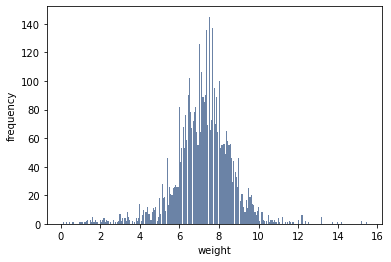

<Figure size 576x432 with 0 Axes>

In [55]:
# plotting the hist of first babies weight

thinkplot.Hist(first_hist,)
thinkplot.show(xlabel='weight', ylabel='frequency')

the shape of this histogram looks more of a normal distribution

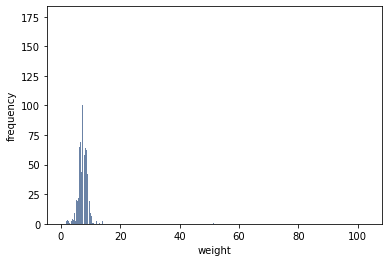

<Figure size 576x432 with 0 Axes>

In [57]:
# computing the frenquency of other other babies


other_hist = thinkstats2.Hist(others.totalwgt_lb)

# plotting the hist

thinkplot.Hist(other_hist)
thinkplot.show(xlabel='weight', ylabel='frequency')

from the result above it looks like there is outliers.

In [58]:
# checking if there is any outliers.

for weight, freq in other_hist.Largest(10):
    print(weight,freq)

103.0625 1
51.375 1
15.1875 1
14.1875 7
14.0 2
13.5 1
13.1875 13
13.0 1
12.1875 5
12.0 2


it looks we have an errors in the data. a baby weight 103.0625lb and 51.375lb\
will remove this data point from data frame and plot again the histogram for first babies

In [60]:
others = others[others.totalwgt_lb <20]

other_hist = thinkstats2.Hist(others.totalwgt_lb)
for weight, freq in other_hist.Largest(10):
    print(weight,freq)

15.1875 1
14.1875 7
14.0 2
13.5 1
13.1875 13
13.0 1
12.1875 5
12.0 2
11.9375 1
11.75 1


it looks like that we got rid of that data point.
lets plot the histogram one more time.

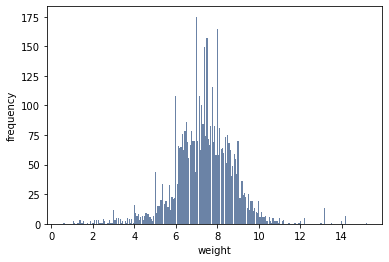

<Figure size 576x432 with 0 Axes>

In [61]:
# computing the frenquency of other other babies

other_hist = thinkstats2.Hist(others.totalwgt_lb)

# plotting the hist

thinkplot.Hist(other_hist)
thinkplot.show(xlabel='weight', ylabel='frequency')

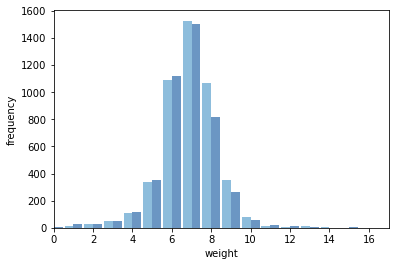

In [99]:

#rounding total weight before plotting

first2 = np.floor(first_baby.totalwgt_lb)
other2 = np.floor(others.totalwgt_lb)

# computing the frenquency of first babies and others
first_hist2 = thinkstats2.Hist(first2)
other_hist2 = thinkstats2.Hist(other2)

# plotting the hist

thinkplot.PrePlot(2)
thinkplot.Hist(first_hist2, align='left', width = 0.45)
thinkplot.Hist(other_hist2, align='right', width = 0.45)

thinkplot.Config(xlabel='weight', ylabel='frequency',xlim=[0, 17])

In [84]:
# the summary discription 
print (first_baby.totalwgt_lb.describe())

count    4380.000000
mean        7.220905
std         1.458378
min         0.125000
25%         6.437500
50%         7.312500
75%         8.000000
max        15.437500
Name: totalwgt_lb, dtype: float64


In [85]:
# the summary discription 
print (others.totalwgt_lb.describe())

count    4704.000000
mean        7.361355
std         1.463537
min         0.562500
25%         6.500000
50%         7.375000
75%         8.250000
max        15.187500
Name: totalwgt_lb, dtype: float64


### descriptive statistics

on average the total weight for first_baby  is 7.22lb  with a standard deviation 1.46lb\
on average the total weight for others      is 7.36lb  with a standard deviation 1.46lb

the diffrence between average weight of first babies and others is: 7.22 - 7.36 = <b>-0.14lb</b>\
it looks like the other babies are <b>ligher</b> than first babies on average  by 0.14lb
the two groups have the same Standard deviation 1.46lb

### Effect Size calculations

In [98]:
# Computes Cohen's effect size for both groups.

group1 = first_baby.totalwgt_lb
group2 = others.totalwgt_lb

diff = group1.mean() - group2.mean()

var1 = group1.var()
var2 = group2.var()
n1, n2 = len(group1), len(group2)

pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
d = diff / np.sqrt(pooled_var)
d

-0.09612938700275275

Cohen’s d statistic <b>-0.096</b> confirms that first babies on average are lighter than other babies and tell us the effect of size of both Groups is only 0.096 standard deviation which is very small. 

###  how does it compare to the diffrence in pregnancy length ?

pregnancy length study revealed that first babies are late but not that late because the difference in average was just 13hours with effect size Cohen’s d equal to 0.029 standard deviation which is very small.

Total weight study revealed that first babies are lighter on average by 0.14lb with effect size Cohen’s d equal to 0.096 standard deviation which is also very small.

First study had a positive direction of the difference +13hours which means late to be born.\
Second study had a negative difference -0.14lb which means lighter weight with same standard deviation for both groups. Which was very interesting and helped to compare both groups
